# Simplified AlexNet implementation

## Loading CIFAR10 

In [10]:
import tensorflow as tf
import tensorflow.keras as keras

In [11]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [13]:
# normalization
X_train, X_test = X_train/255.0, X_test/255.0

## Data visualization

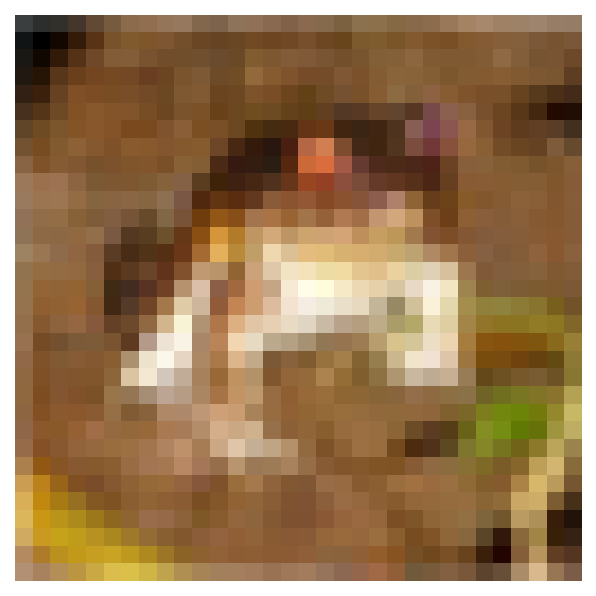

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5), dpi=150)
plt.imshow(X_train[0])
plt.axis('off')
plt.show()

## Data visualization with legend

[6]
frog


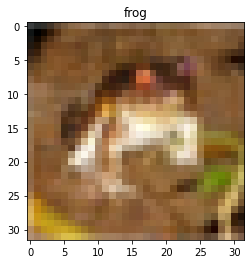

In [6]:
import matplotlib.pyplot as plt

label_dict = {0: 'airplane', 1: 'automobile', 2: 'bird',
              3: 'cat',      4: 'deer',       5: 'dog',
              6: 'frog',     7: 'horse',      8: 'ship',
              9: 'truck'}
print(y_train[0])
print(label_dict[6])
plt.imshow(X_train[0])
plt.title(label_dict[6])
plt.show()

## Construct a model

In [7]:
## Simplifed Alexnet

from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D

model_alexnet = Sequential()

# 1st stack: [conv]+[ReLU]+[pool]
model_alexnet.add(Conv2D(input_shape = (32,32,3),
                         kernel_size = (3,3),
                         strides=(1,1),
                         filters=48,
                         padding='same',
                         activation='relu'))
model_alexnet.add(MaxPool2D(pool_size = (2,2),
                            strides = (2,2),
                            padding = 'valid'))

# 2nd stack: [conv]+[ReLU]+[pool]
model_alexnet.add(Conv2D(kernel_size = (3,3),
                         strides=(1,1),
                         filters=96,
                         padding='same',
                         activation='relu'))
model_alexnet.add(MaxPool2D(pool_size = (2,2),
                            strides = (2,2),
                            padding = 'valid'))

# 3rd stack: [conv]+[ReLU]
model_alexnet.add(Conv2D(kernel_size = (3,3),
                         strides=(1,1),
                         filters=192,
                         padding='same',
                         activation='relu'))

# 4th stack: [conv]+[ReLU]
model_alexnet.add(Conv2D(kernel_size = (3,3),
                         strides=(1,1),
                         filters=192,
                         padding='same',
                         activation='relu'))

# 5th stack: [conv]+[ReLU]+[pool]
model_alexnet.add(Conv2D(kernel_size = (3,3),
                         strides=(1,1),
                         filters=256,
                         padding='same',
                         activation='relu'))
model_alexnet.add(MaxPool2D(pool_size = (2,2),
                            strides = (2,2),
                            padding = 'valid'))

# 6th layer: 512 fully connected
model_alexnet.add(Flatten())
model_alexnet.add(Dense(512,activation='relu'))

# 7th layer: 256 fully connected
model_alexnet.add(Dense(256,activation='relu'))

# 8th layer: 10 output
model_alexnet.add(Dense(10,activation='softmax'))

model_alexnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 48)        1344      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 96)        41568     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 96)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 192)         166080    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 192)         3

## Compile

In [8]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate = 0.001,
          beta_1 = 0.9,
          beta_2 = 0.999)

model_alexnet.compile(optimizer = opt,
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

## Training

In [9]:
# Training
model_alexnet.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 114s 72ms/step - loss: 1.5567 - acc: 0.4219
Epoch 2/20
1563/1563 [==============================] - 112s 71ms/step - loss: 1.0905 - acc: 0.6082
Epoch 3/20
1563/1563 [==============================] - 112s 72ms/step - loss: 0.8754 - acc: 0.6921
Epoch 4/20
1563/1563 [==============================] - 111s 71ms/step - loss: 0.7355 - acc: 0.7408
Epoch 5/20
1563/1563 [==============================] - 114s 73ms/step - loss: 0.6251 - acc: 0.7795
Epoch 6/20
1563/1563 [==============================] - 113s 72ms/step - loss: 0.5263 - acc: 0.8156
Epoch 7/20
1563/1563 [==============================] - 111s 71ms/step - loss: 0.4474 - acc: 0.8428
Epoch 8/20
1563/1563 [==============================] - 111s 71ms/step - loss: 0.3739 - acc: 0.8681
Epoch 9/20
1563/1563 [==============================] - 112s 72ms/step - loss: 0.3157 - acc: 0.8900
Epoch 10/20
1563/1563 [==============================] - 111s 71ms/step - loss: 0.2773 - acc: 0.9033

In [10]:
# Evaluation
test_performance = model_alexnet.evaluate(X_test,y_test)
print(test_performance)

313/313 [==============================] - 7s 20ms/step - loss: 1.5235 - acc: 0.7277
[1.523450493812561, 0.7276999950408936]
